<a href="https://colab.research.google.com/github/sunkusun9/ML2022_1/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

표준정규분포를 따르는 x_0, x_1을 200개 생성
beta_0 = 1, beta_1 = -0.1, beta_2 = 0.8 이고
노이즈의 분산을 0.4로 하여 y를 생성

In [ ]:
n = 200 # 데이터 생성 수
np.random.seed(42) # 랜덤 Seedㄹ를 42로 지정하여 동일한 난수 생성
x_0 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
y_0 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)

In [ ]:
from sklearn.datasets import make_regression

[sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) 회귀 분석 데이터셋을 만든다. 

n_samples=100, n_features=5, n_informative=3, random_state=9, coef=True 로 해서 데이터셋 생성하여 입력 값은 X에 출력은 y 값, 계수는 coef에 설정.

In [ ]:
X, y, coef = make_regression(n_samples=100, n_features=5, n_informative=3, random_state=9, coef=True)
X.shape, y.shape, coef

((100, 5),
 (100,),
 array([ 6.74479784, 71.20447834,  0.        ,  0.        , 50.7033102 ]))

각각의 속성과, y를 산포도 그래프로 시각화

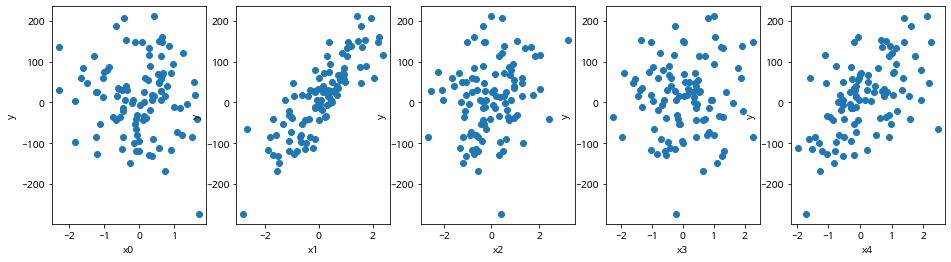

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
for i, ax in enumerate(axs):
    col_name = 'x{}'.format(i)
    ax.scatter(X[:, i], y, label=col_name)
    ax.set_xlabel(col_name)
    ax.set_ylabel("y")
plt.show()